In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])

id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

j=1
k=21
r=1

In [17]:
def plotter(r,n):
    conspiracy_tl = []
    conspiracy_ei = []
    conspiracy_dt = []
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        # coms = top_ns_50.index.get_level_values(0)
        coms = top_ns_75.index.get_level_values(0)
        # subs = top_ns_50.index.get_level_values(1)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conspiracy']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conspiracy_dt += [date]
    conservative_tl = []
    conservative_ei = []
    conservative_dt = []
    
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        # coms = top_ns_50.index.get_level_values(0)
        coms = top_ns_75.index.get_level_values(0)
        # subs = top_ns_50.index.get_level_values(1)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conservative']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conservative_dt += [date]

    fig = plt.figure(figsize=(35,10))
    plt.scatter(y=[0 for _ in _center_dates], x=_center_dates, s=0, alpha=0, c='w')
    plt.scatter(y=conspiracy_ei, x=conspiracy_dt, s=[s/1000 for s in conspiracy_tl], alpha=0.25, c='black', label='conspiracy')
    plt.scatter(y=conservative_ei, x=conservative_dt, s=[s/1000 for s in conservative_tl], alpha=0.25, c='r', label='conservative')
    plt.xticks(rotation=90)
    plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
    plt.ylabel('EI - Index')
    plt.xlabel('Date')
    plt.legend()

In [28]:
def agg_plotter(r,n):
    tl = []
    ei = []
    dt = []
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        coms = top_ns_75.index.get_level_values(0)
        subs = top_ns_75.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})

        t1 = 0
        e1 = 0

        insubs = ['conspiracy']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            t1 += ei_df.loc[incom, ['Total_Links','EI_Index']][0]
            e1 += ei_df.loc[incom, ['Total_Links','EI_Index']][1]
        insubs = ['conservative']

        t2 = 0
        e2 = 0

        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            t2 += ei_df.loc[incom, ['Total_Links','EI_Index']][0]
            e2 += ei_df.loc[incom, ['Total_Links','EI_Index']][1]


        tl += [(t1 + t2) / 2]
        ei += [(e1 + e2) / 2]
        dt += [date]

    

    fig = plt.figure(figsize=(35,10))

    plt.scatter(y=[0 for _ in _center_dates], x=_center_dates, s=0, alpha=0, c='w')
    plt.scatter(y=ei, x=dt, s=[s/1000 for s in tl], alpha=0.25, c='black')
    plt.xticks(rotation=90)
    plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
    plt.ylabel('EI - Index')
    plt.xlabel('Date')
    plt.legend()

In [3]:
conspiracy_tl = []
conspiracy_ei = []
conspiracy_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    # coms = top_ns_50.index.get_level_values(0)
    coms = top_ns_75.index.get_level_values(0)
    # subs = top_ns_50.index.get_level_values(1)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conspiracy']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conspiracy_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

2020-10-04 15
2020-10-05 7
2020-10-06 20
2020-10-07 12
2020-10-08 176
2020-10-09 16
** 2020-10-10 0 comm
** 2020-10-11 0 comm
2020-10-12 61
2020-10-13 18
2020-10-14 11
2020-10-15 101
2020-10-16 29
2020-10-17 18
2020-10-18 19
2020-10-19 21
2020-10-20 8
2020-10-21 23
2020-10-22 33
2020-10-23 465
2020-10-24 48
2020-10-25 33
2020-10-26 20
2020-10-27 12
2020-10-28 7
2020-10-29 24
2020-10-30 18
** 2020-10-31 0 comm
2020-11-01 30
2020-11-02 99
2020-11-03 403
2020-11-04 170
** 2020-11-05 2 comm
2020-11-06 11
2020-11-07 34
2020-11-08 88
2020-11-09 8
2020-11-10 36
2020-11-11 2599
2020-11-12 110
2020-11-13 18
2020-11-14 15
2020-11-15 73
2020-11-16 205
2020-11-17 12
2020-11-18 57
2020-11-19 134
2020-11-20 313
2020-11-21 74
** 2020-11-22 2 comm
2020-11-23 42
2020-11-24 12
2020-11-25 49
2020-11-26 32
2020-11-27 184
2020-11-28 99
2020-11-29 35
2020-11-30 25
2020-12-01 22
2020-12-02 7
2020-12-03 16
2020-12-04 10
2020-12-05 8
2020-12-06 80
2020-12-07 15
2020-12-08 9
2020-12-09 9
2020-12-10 1566
2020-12

In [4]:
conservative_tl = []
conservative_ei = []
conservative_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    # coms = top_ns_50.index.get_level_values(0)
    coms = top_ns_75.index.get_level_values(0)
    # subs = top_ns_50.index.get_level_values(1)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conservative']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conservative_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

2020-10-04 15
2020-10-05 7
2020-10-06 20
2020-10-07 12
2020-10-08 176
2020-10-09 16
** 2020-10-10 0 comm
** 2020-10-11 0 comm
2020-10-12 61
2020-10-13 18
2020-10-14 11
2020-10-15 24
2020-10-16 29
2020-10-17 18
2020-10-18 19
2020-10-19 21
2020-10-20 8
2020-10-21 9
2020-10-22 33
2020-10-23 465
2020-10-24 48
2020-10-25 33
2020-10-26 20
** 2020-10-27 2 comm
2020-10-28 7
2020-10-29 24
2020-10-30 18
2020-10-31 3
2020-11-01 30
2020-11-02 99
2020-11-03 212
2020-11-04 170
2020-11-05 0
2020-11-06 0
2020-11-07 163
2020-11-08 88
2020-11-09 8
2020-11-10 16
2020-11-11 2599
2020-11-12 110
2020-11-13 18
2020-11-14 15
2020-11-15 73
2020-11-16 205
2020-11-17 12
2020-11-18 57
2020-11-19 134
2020-11-20 313
2020-11-21 74
2020-11-22 6
2020-11-23 42
2020-11-24 12
2020-11-25 49
2020-11-26 32
2020-11-27 184
2020-11-28 99
2020-11-29 35
2020-11-30 25
** 2020-12-01 0 comm
2020-12-02 7
2020-12-03 16
2020-12-04 10
2020-12-05 8
** 2020-12-06 0 comm
2020-12-07 15
2020-12-08 9
2020-12-09 9
** 2020-12-10 0 comm
2020-12

In [5]:
nonewnormal_tl = []
nonewnormal_ei = []
nonewnormal_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    # coms = top_ns_50.index.get_level_values(0)
    coms = top_ns_75.index.get_level_values(0)
    # subs = top_ns_50.index.get_level_values(1)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['nonewnormal']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        nonewnormal_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        nonewnormal_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        nonewnormal_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

** 2020-10-04 0 comm
** 2020-10-05 0 comm
** 2020-10-06 0 comm
** 2020-10-07 0 comm
** 2020-10-08 0 comm
** 2020-10-09 0 comm
** 2020-10-10 0 comm
** 2020-10-11 0 comm
** 2020-10-12 0 comm
** 2020-10-13 0 comm
** 2020-10-14 0 comm
** 2020-10-15 0 comm
** 2020-10-16 0 comm
** 2020-10-17 0 comm
** 2020-10-18 0 comm
** 2020-10-19 0 comm
** 2020-10-20 0 comm
** 2020-10-21 0 comm
** 2020-10-22 0 comm
** 2020-10-23 0 comm
** 2020-10-24 0 comm
** 2020-10-25 0 comm
** 2020-10-26 0 comm
** 2020-10-27 0 comm
** 2020-10-28 0 comm
** 2020-10-29 0 comm
** 2020-10-30 0 comm
** 2020-10-31 0 comm
** 2020-11-01 0 comm
** 2020-11-02 0 comm
** 2020-11-03 0 comm
** 2020-11-04 0 comm
** 2020-11-05 0 comm
** 2020-11-06 0 comm
2020-11-07 34
** 2020-11-08 0 comm
** 2020-11-09 0 comm
2020-11-10 36
** 2020-11-11 0 comm
** 2020-11-12 0 comm
** 2020-11-13 0 comm
** 2020-11-14 0 comm
** 2020-11-15 0 comm
** 2020-11-16 0 comm
** 2020-11-17 0 comm
** 2020-11-18 0 comm
** 2020-11-19 0 comm
** 2020-11-20 0 comm
** 202

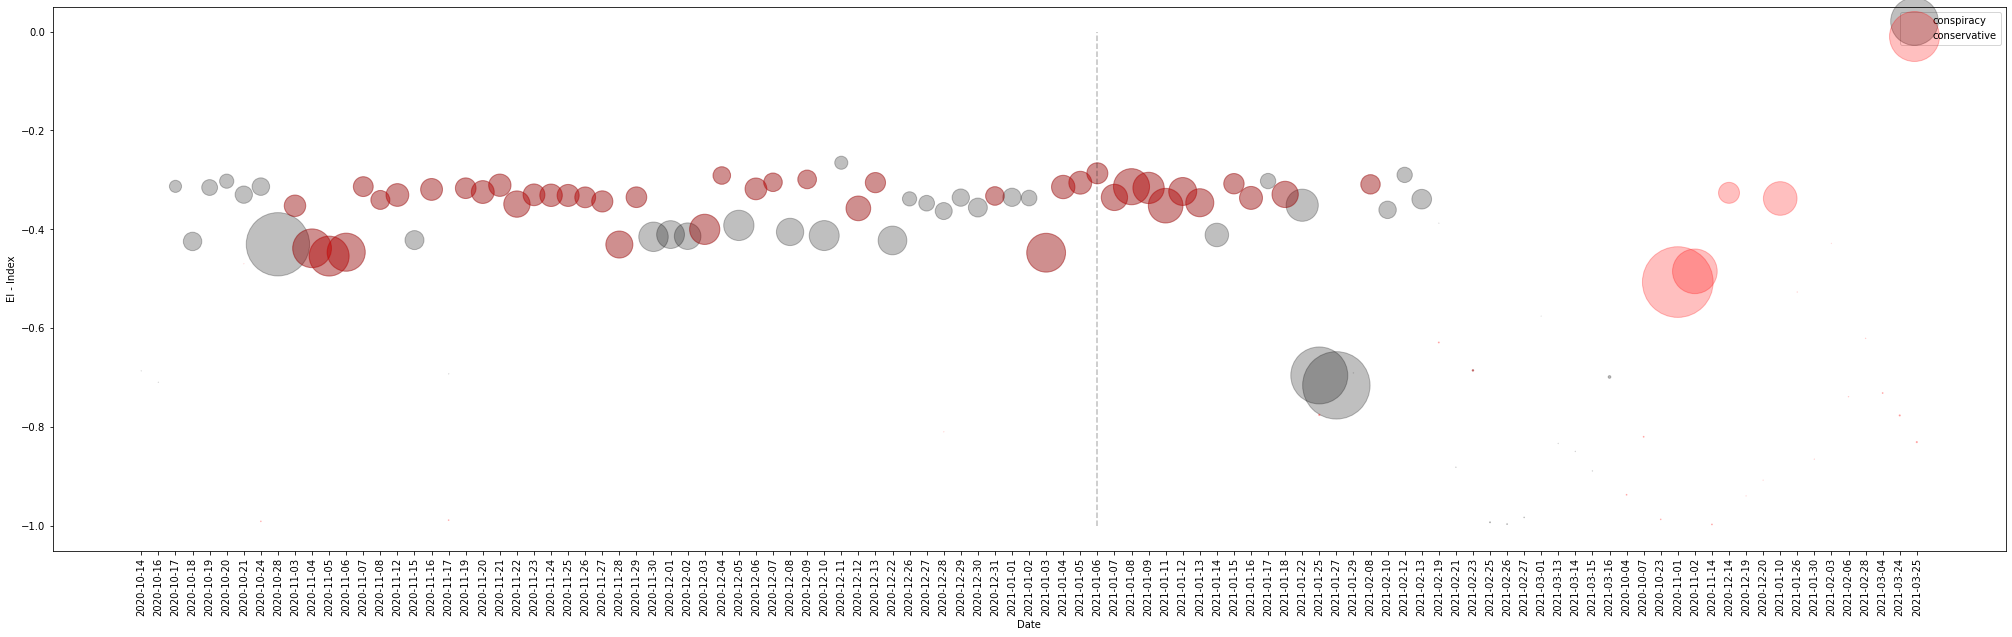

In [6]:
plotter(0.5,5)

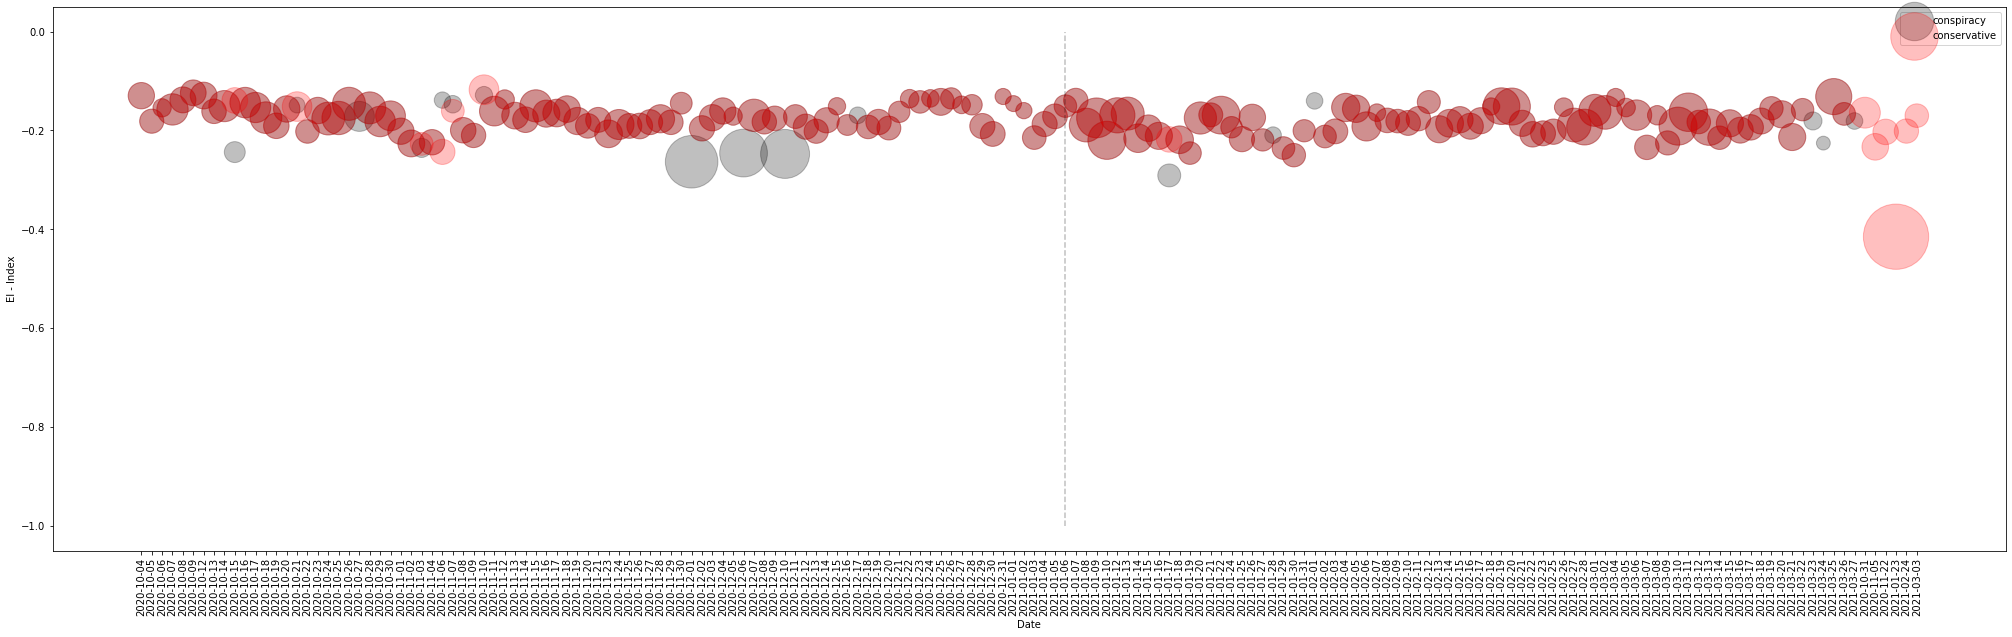

In [7]:
plotter(1,5)

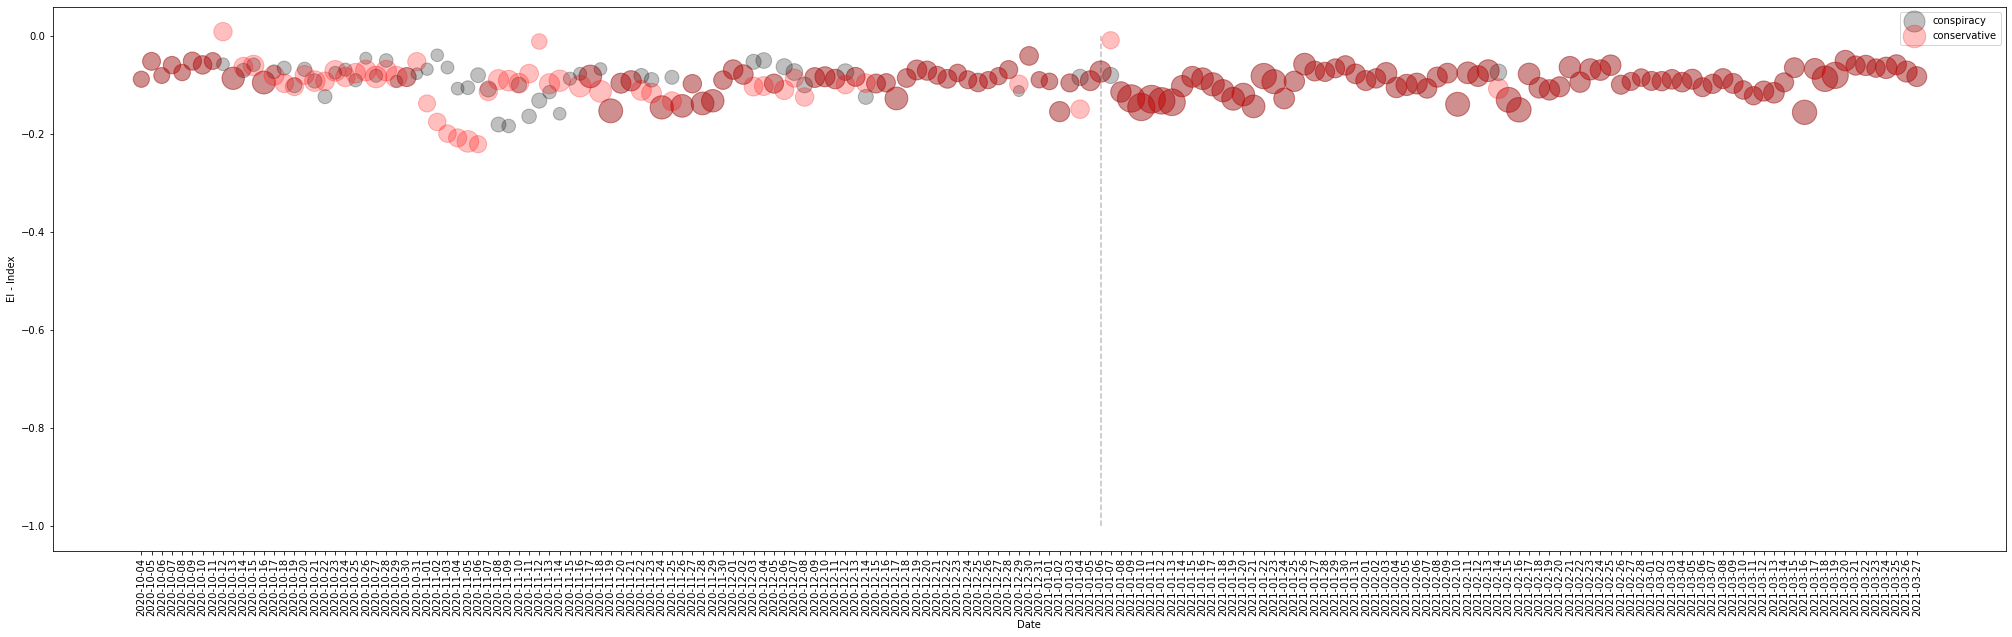

In [8]:
plotter(2,5)

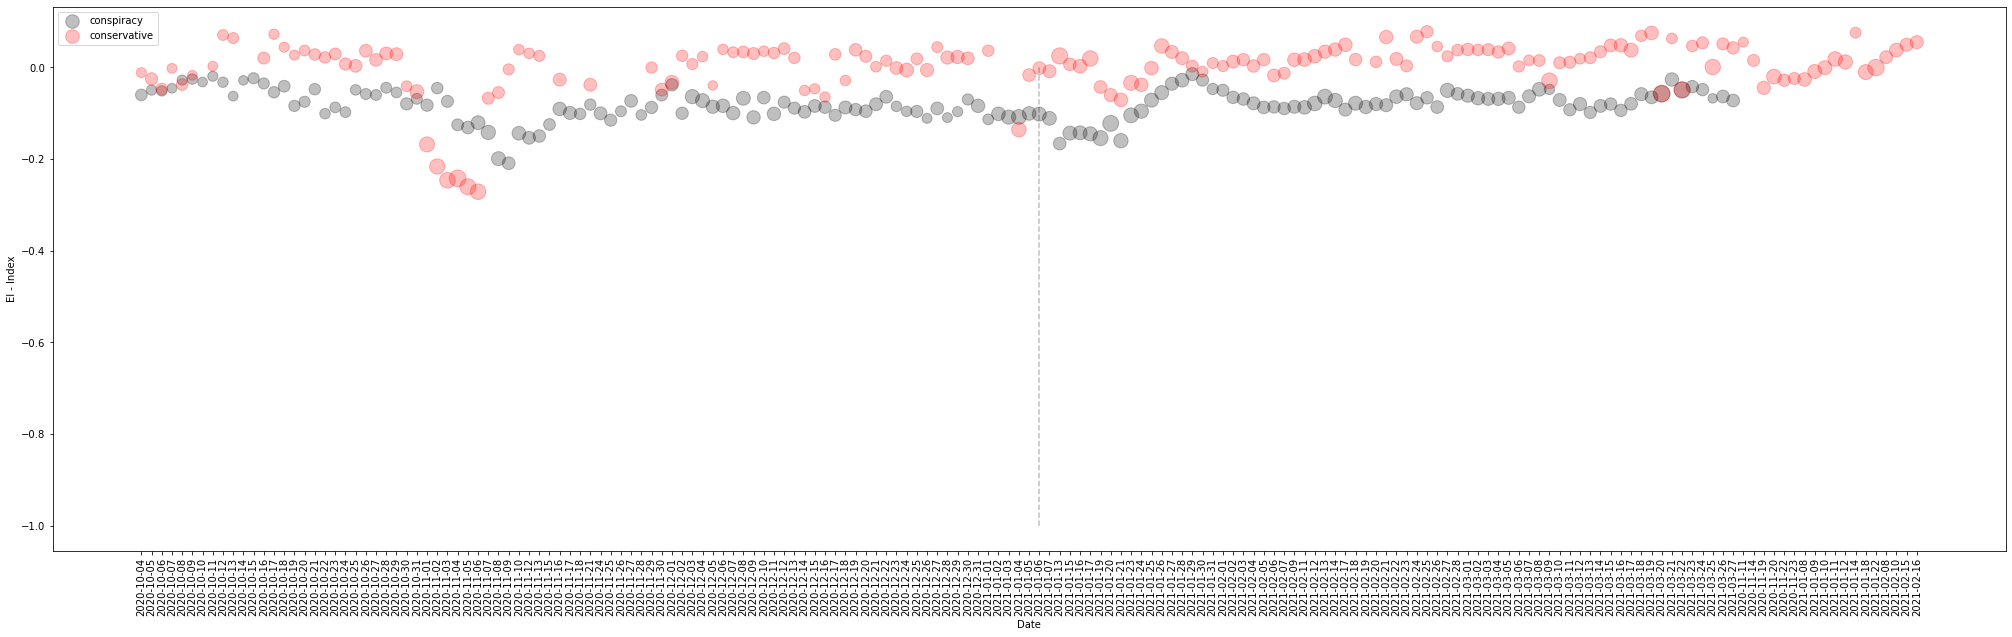

In [9]:
plotter(5,5)

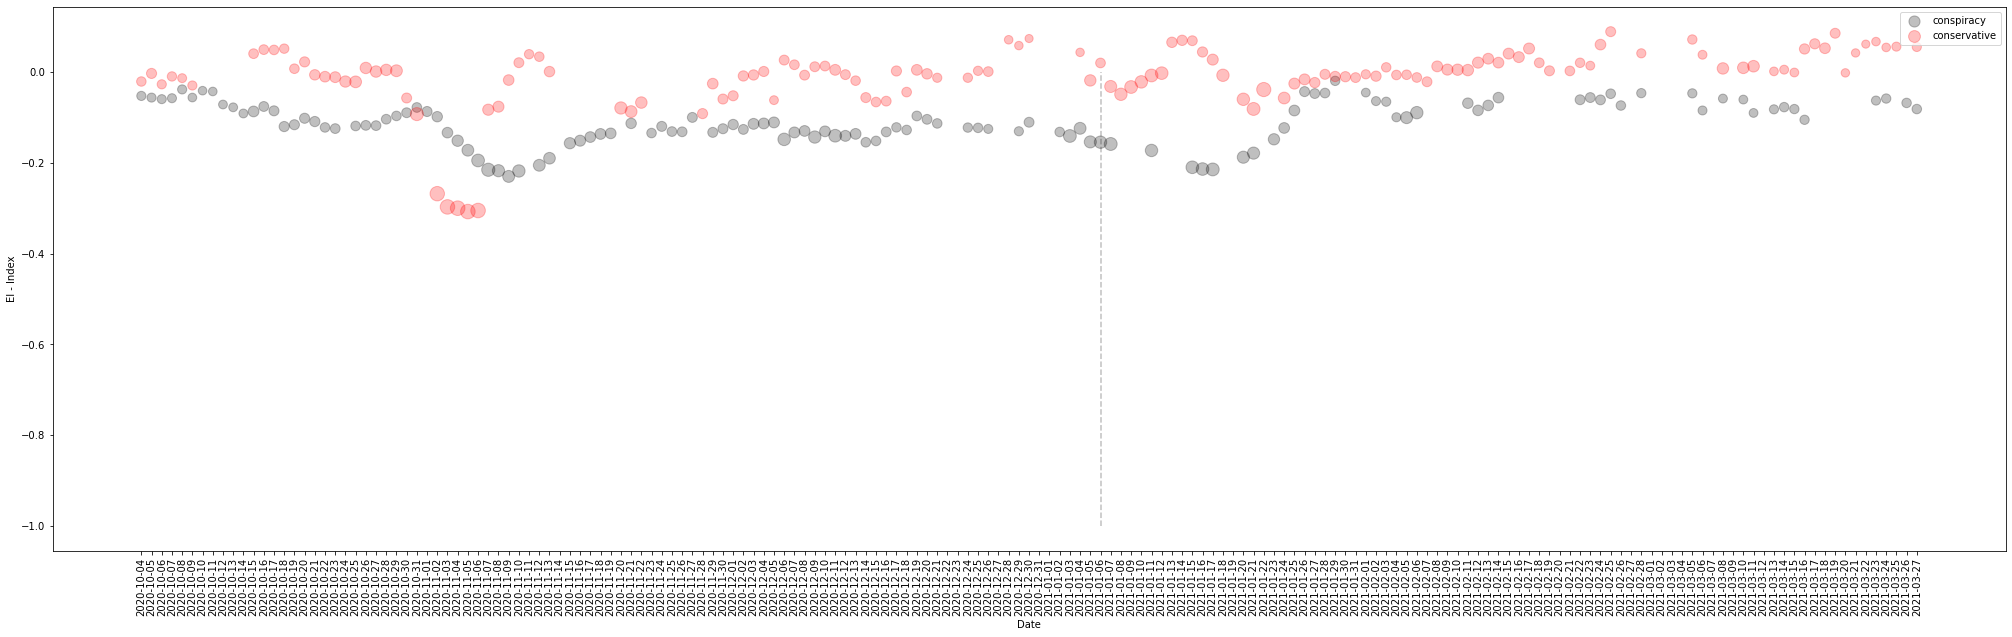

In [35]:
plotter(10,5)

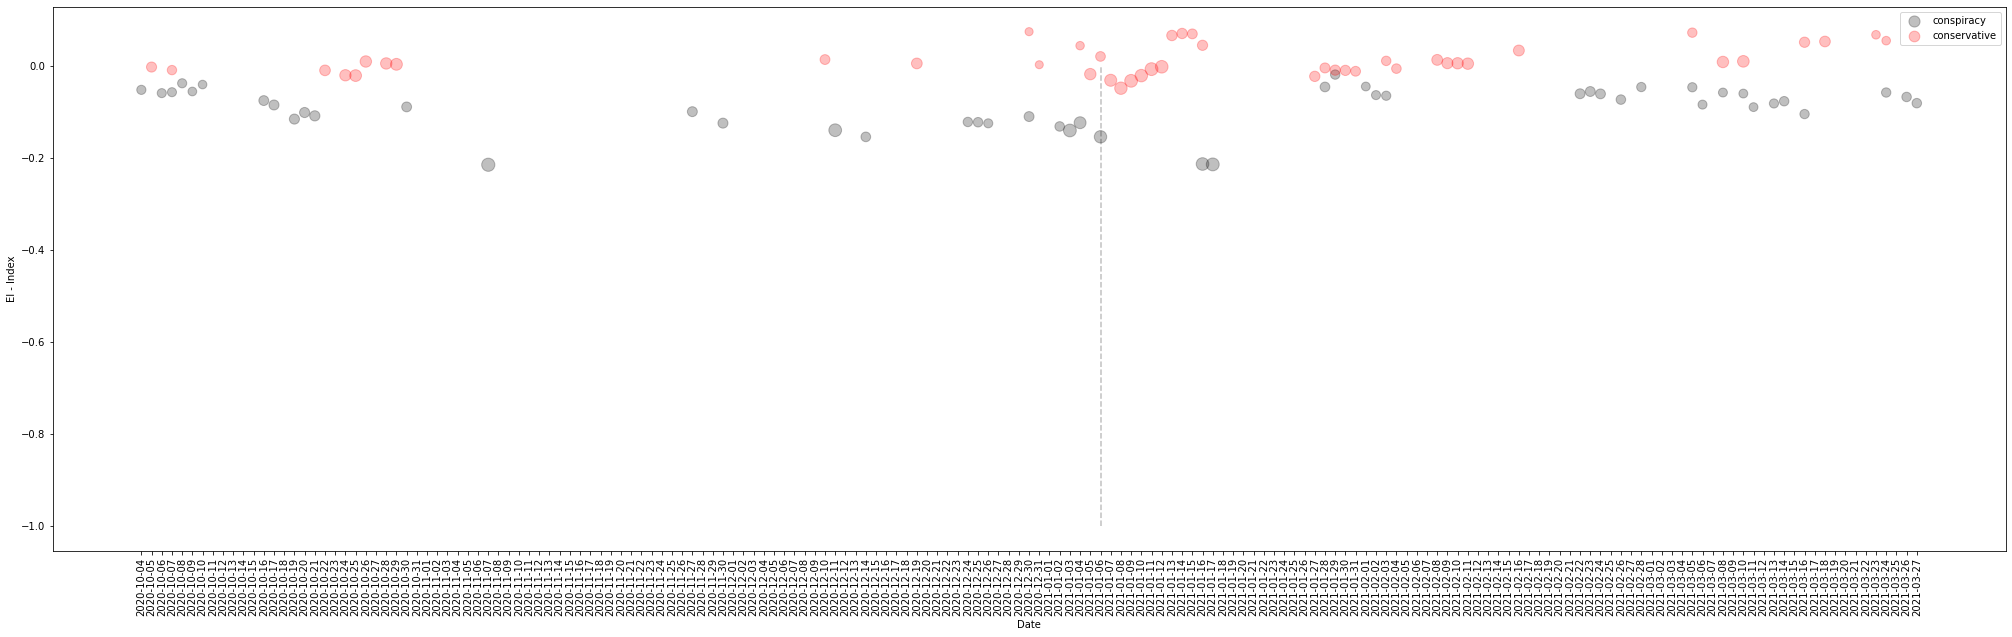

In [36]:
plotter(10,10)

No handles with labels found to put in legend.


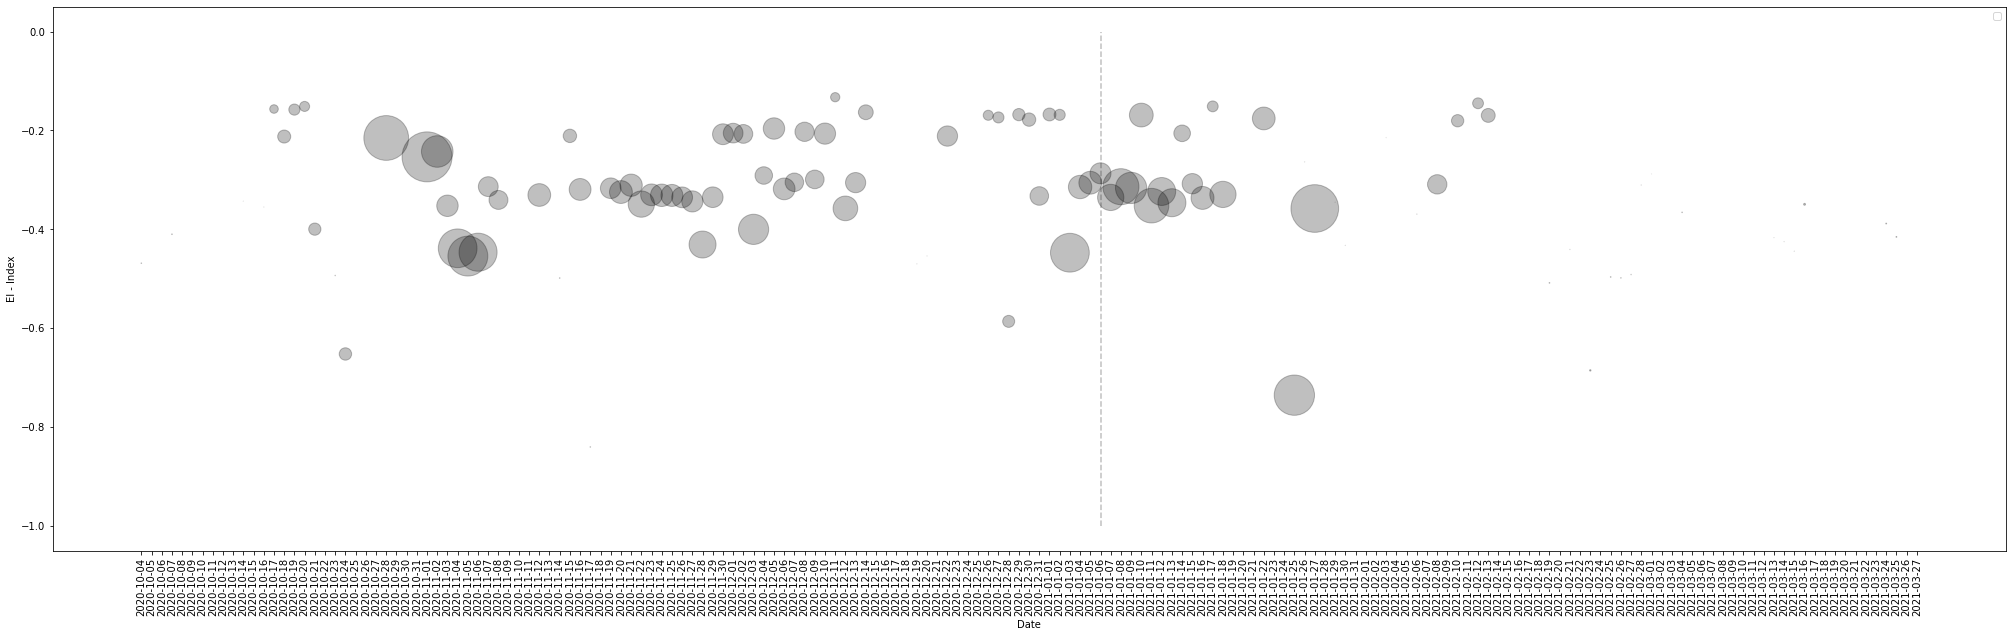

In [29]:
agg_plotter(0.5,5)

No handles with labels found to put in legend.


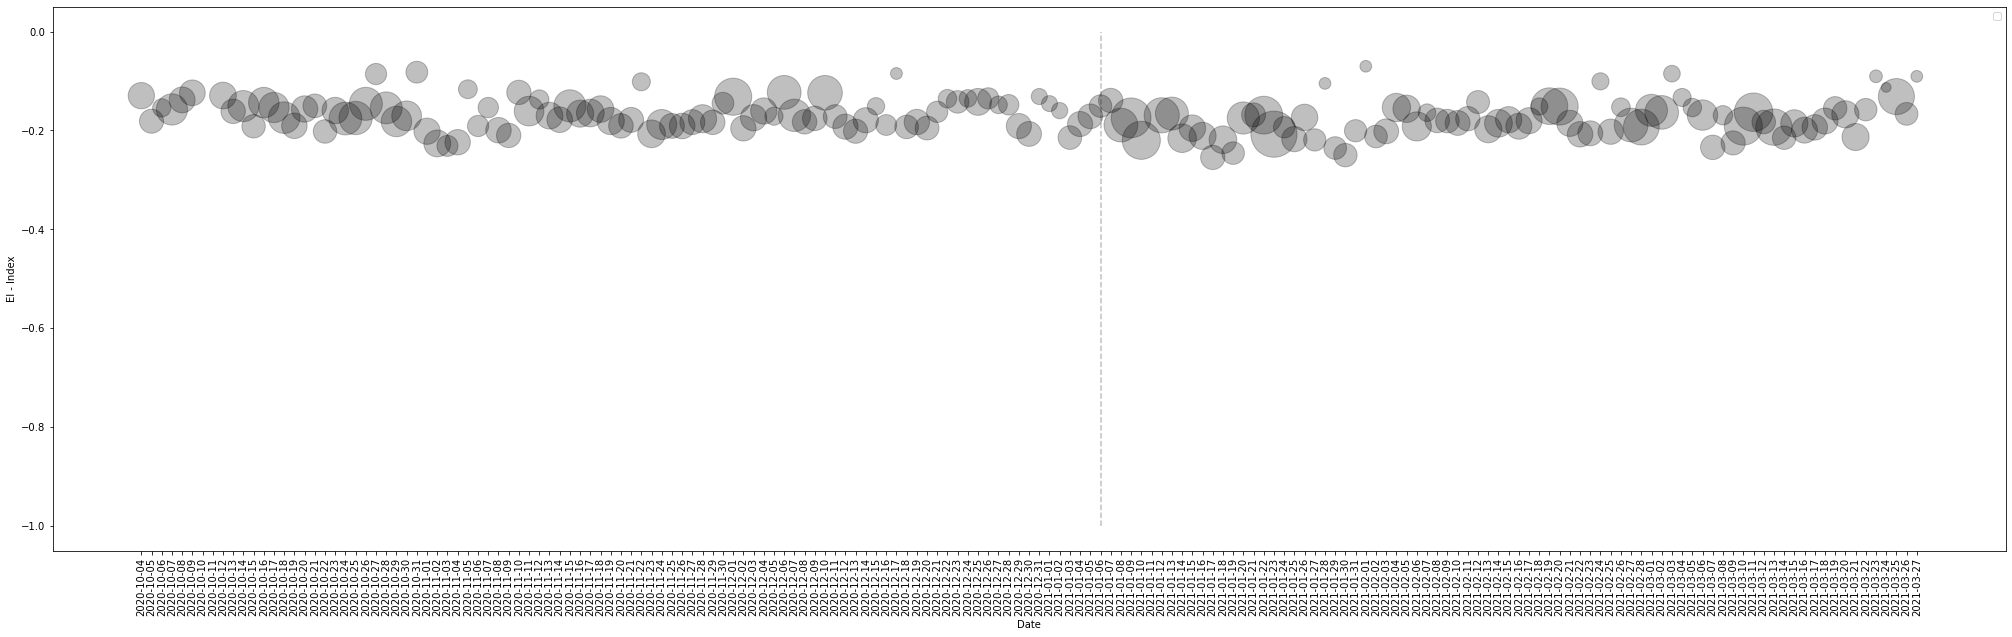

In [30]:
agg_plotter(1,5)

No handles with labels found to put in legend.


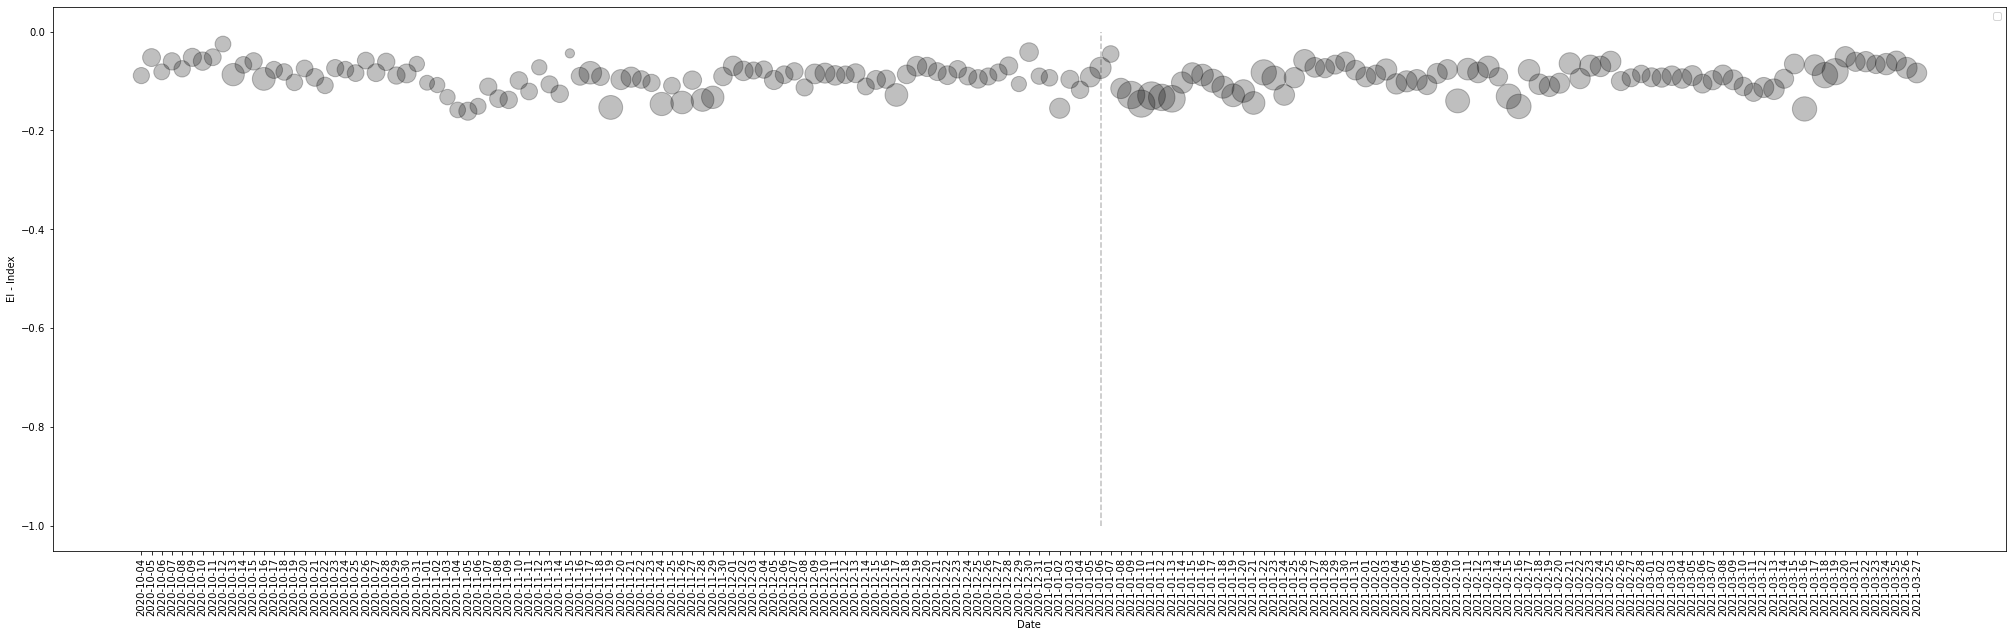

In [31]:
agg_plotter(2,5)

No handles with labels found to put in legend.


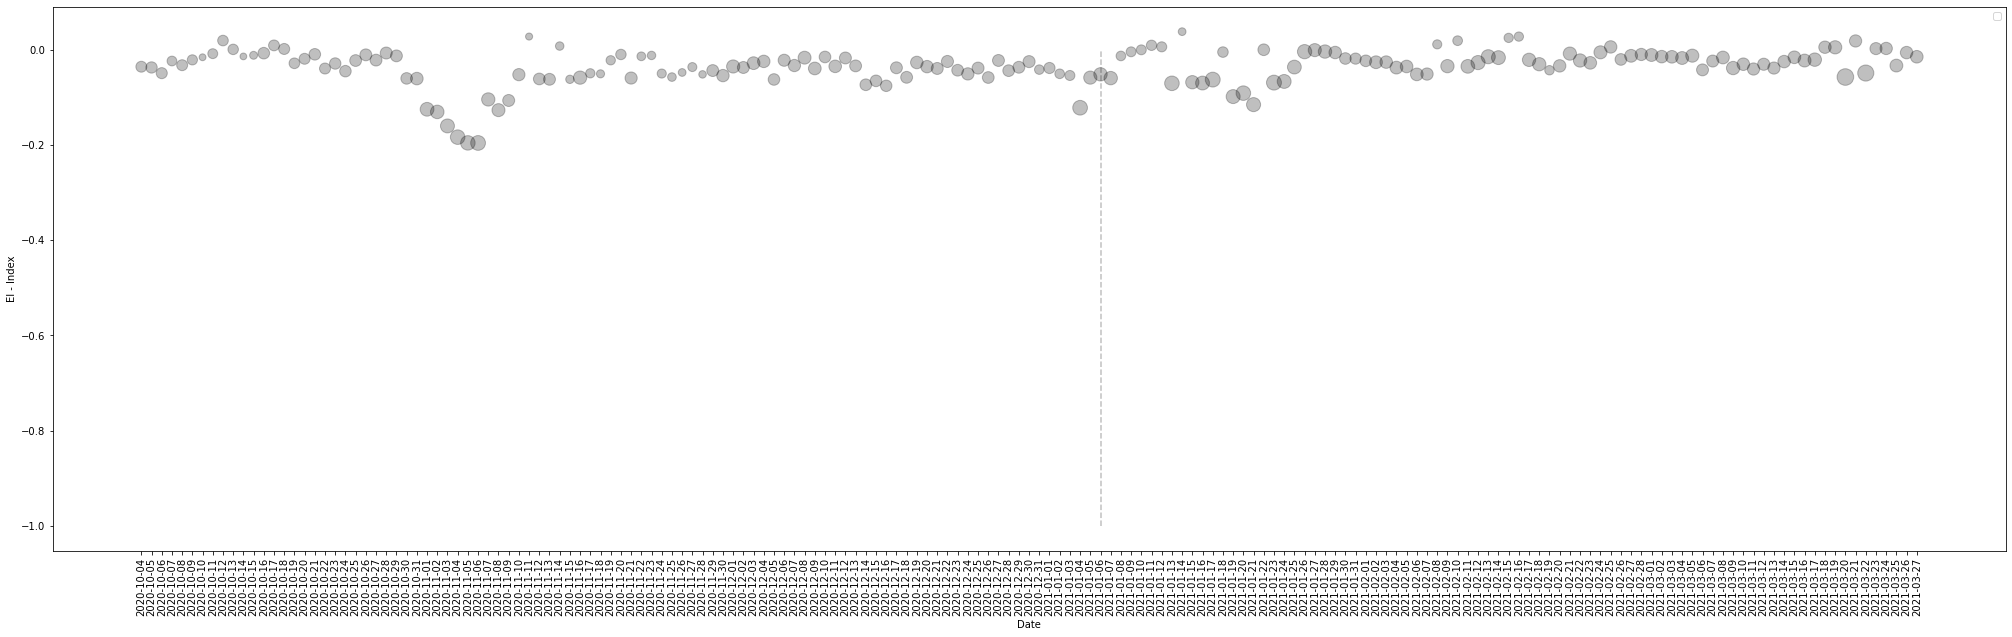

In [33]:
agg_plotter(5,5)

No handles with labels found to put in legend.


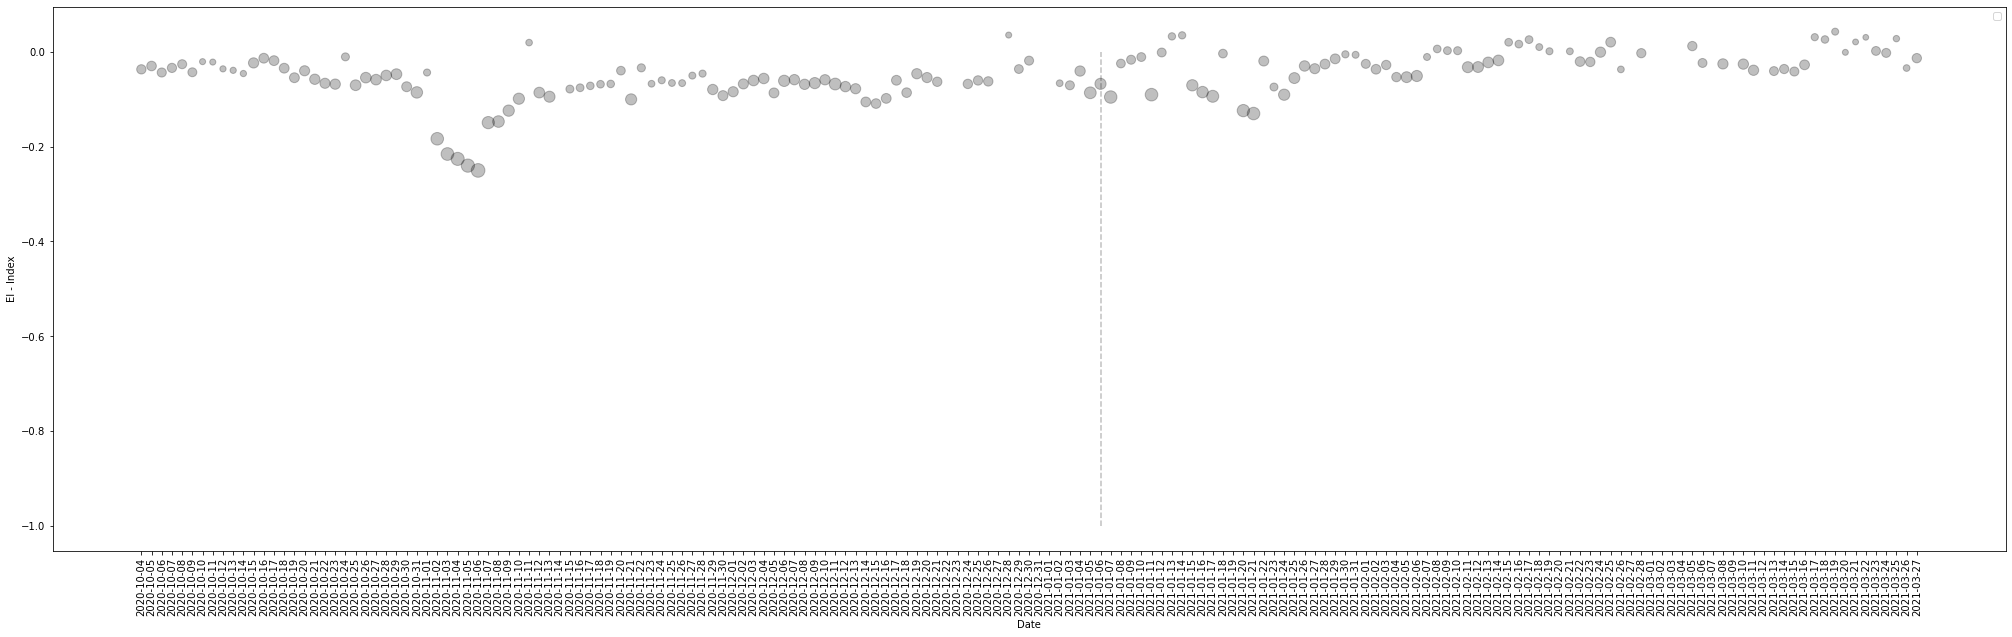

In [34]:
agg_plotter(10,5)

In [11]:
j=1
k=21
r=5

In [12]:
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)

In [13]:
# top_ns_50
top_ns_75

Count
Source_Level Subreddit                    
0            wallstreetbets         463796
             gme                    312873
             wallstreetbetsnew        7711
             askreddit                6428
             amcstock                 4792
1            genshin_impact          84948
             genshin_memepact        19165
             memes                    3148
             houkai3rd                2743
             askreddit                1833
2            de                      48932
             ich_iel                 11621
             austria                  5525
             finanzen                 3112
             askeurope                2515
4            soccer                  60198
             fifa                    22965
             ussoccer                10968
             gunners                  8224
             fut                      8055
5            redditsessions          71438
             distantsocializing      60796
             theyoushow              48311
             thegamerlounge          27415
             redditsets              22924
6            anime                   44815
             goodanimemes            14978
             re_zero                 12555
             manga                   12331
             animemes                 7228
9            squaredcircle           71552
             scjerk                   6954
             aewofficial              5572
             askreddit                2445
             wreddit                  1579
10           leagueoflegends         59044
             legendsofruneterra      10066
             leagueofmemes            7311
             summonerschool           4068
             askreddit                1936
11           teenagers              159561
             memes                   19967
             askreddit               14874
             askteengirls             8232
             askteenboys              6026
12           90dayfiance             19823
             bravorealhousewives     18631
             teenmomogandteenmom2    17331
             90dayfianceuncensored   11786
             thebachelor             11662
13           hockey                  34641
             leafs                   11953
             bostonbruins            10094
             rangers                  8334
             coloradoavalanche        6582
16           mma                     80555
             ufc                     12271
             boxing                  10083
             bjj                      3675
             askreddit                2272
20           vancouver               18271
             canada                  16933
             ontario                 16087
             personalfinancecanada   11276
             toronto                  8722
22           publicfreakout          35178
             actualpublicfreakouts    6079
             askreddit                3507
             politics                 1796
             news                     1792
30           marvelstudios           25384
             dc_cinematic            25221
             movies                  14627
             askreddit                6300
             thefalconandthews        5406
35           politicalhumor          17294
             murderedbywords          3507
             whitepeopletwitter       3502
             politics                 2617
             askreddit                2369
36           aww                     10004
             cats                     6833
             askreddit                2677
             mademesmile              1446
             nextfuckinglevel         1396
38           jailbreak                4267
             oneplus                  3669
             android                  2960
             apple                    2917
             tmobile                  2878
42           ukpolitics              26438
             europe                  2

In [14]:
r=5

In [15]:
guns_tl = []
guns_ei = []
guns_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    # top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    # top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    # coms = top_ns_50.index.get_level_values(0)
    coms = top_ns_75.index.get_level_values(0)
    # subs = top_ns_50.index.get_level_values(1)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['guns']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        guns_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        guns_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        guns_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

2020-10-04 494
2020-10-05 413
2020-10-06 417
2020-10-07 281
2020-10-08 277
2020-10-09 7452
2020-10-10 65
2020-10-11 290
2020-10-12 1658
2020-10-13 367
2020-10-14 11632
2020-10-15 199
2020-10-16 81
2020-10-17 246
2020-10-18 364
2020-10-19 799
2020-10-20 515
2020-10-21 503
2020-10-22 337
2020-10-23 10456
2020-10-24 10846
2020-10-25 373
2020-10-26 516
2020-10-27 254
2020-10-28 4174
2020-10-29 259
2020-10-30 247
2020-10-31 213
2020-11-01 454
2020-11-02 10502
2020-11-03 3259
2020-11-04 1
2020-11-05 457
2020-11-06 291
2020-11-07 407
2020-11-08 12421
2020-11-09 209
2020-11-10 92
2020-11-11 1118
2020-11-12 99
2020-11-13 258
2020-11-14 488
2020-11-15 332
2020-11-16 154
2020-11-17 10965
2020-11-18 187
2020-11-19 8898
2020-11-20 230
2020-11-21 326
2020-11-22 12828
2020-11-23 12592
2020-11-24 10955
2020-11-25 45
2020-11-26 13974
2020-11-27 5116
2020-11-28 333
2020-11-29 3049
2020-11-30 25
2020-12-01 158
2020-12-02 260
2020-12-03 555
2020-12-04 502
2020-12-05 341
2020-12-06 802
2020-12-07 1721
2020

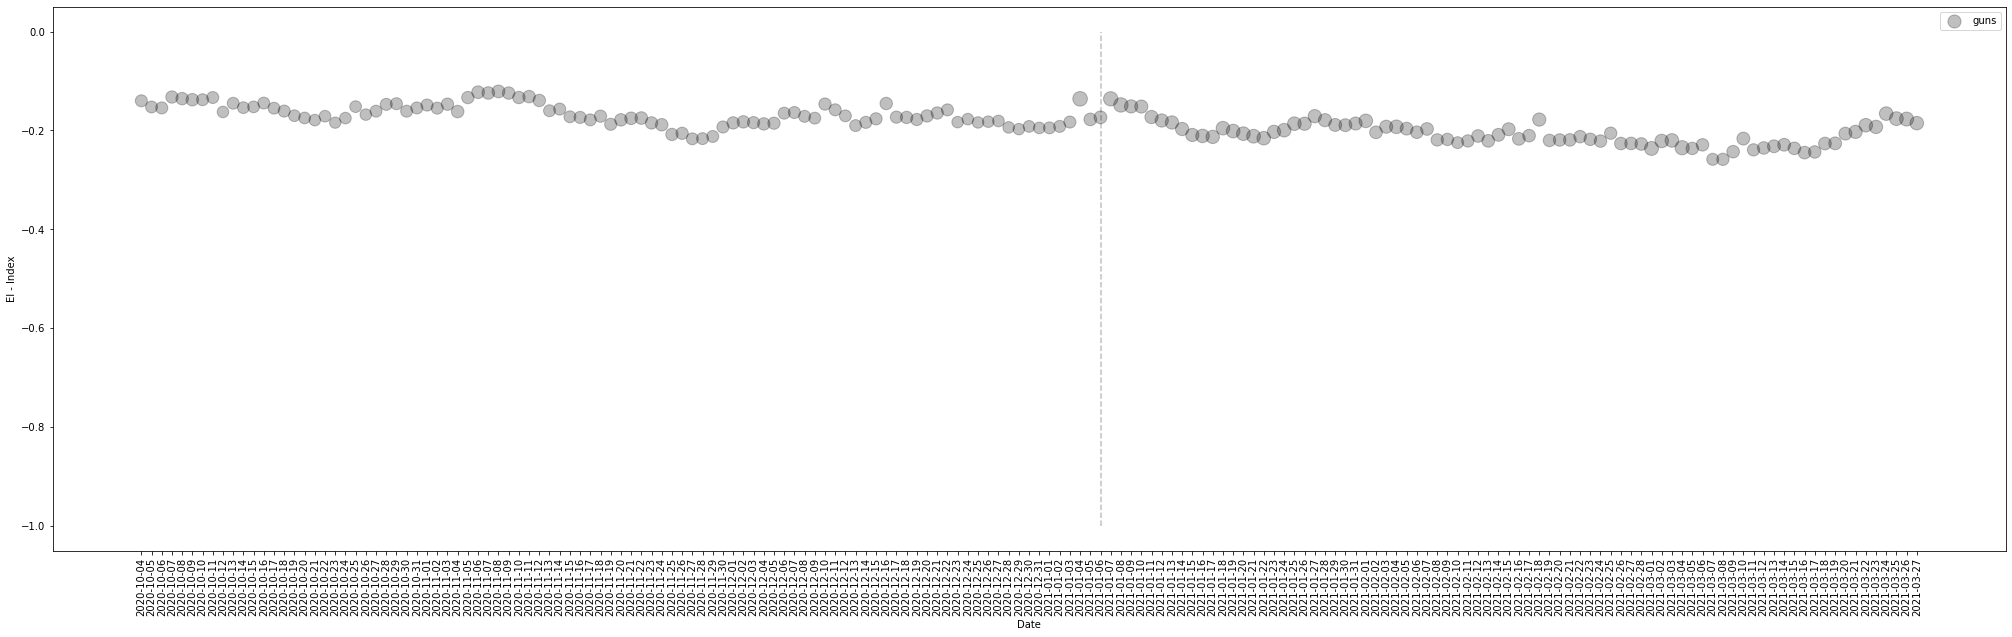

In [16]:
fig = plt.figure(figsize=(35,10))
plt.scatter(y=guns_ei, x=guns_dt, s=[s/1000 for s in guns_tl], alpha=0.25, c='black', label='guns')
plt.xticks(rotation=90)
plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
plt.ylabel('EI - Index')
plt.xlabel('Date')
plt.legend()